<a href="https://colab.research.google.com/github/dlsmdksndns/BME/blob/main/Task_1_BME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

!pip install requests beautifulsoup4 lxml
import requests
from bs4 import BeautifulSoup

from IPython.display import display, Markdown

In [2]:
# Función para descargar los datos desde yahoo finance.

def get_stocks_data(tickers, start_date, end_date):
    data = pd.DataFrame()
    for ticker in tickers:
        stock_data = yf.download(ticker, start=start_date, end=end_date)['Close']
        data[ticker] = stock_data
    return data

# **INPUTS DE ENTRADA**

In [44]:
# Inputs de entrada: Fechas y Activos.

stocks = ['SAP.DE', 'ASML.AS', 'MC.PA', 'SIE.DE', 'AIR.PA', 'BNP.PA', 'ITX.MC', 'ALV.DE', 'SU.PA', 'SAF.PA']
start_date = '2010-01-01'
end_date = '2025-11-01'

In [41]:
# Llamamos a la función de descarga

stock_data = get_stocks_data(stocks, start_date, end_date)

/tmp/ipython-input-586117072.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start=start_date, end=end_date)['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-586117072.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start=start_date, end=end_date)['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-586117072.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start=start_date, end=end_date)['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-586117072.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start=start_date, end=end_date)['Close']
[*********************100%***********

In [40]:
# Veamos que pinta tiene

stock_data.head()

,SAP.DE,ASML.AS,MC.PA,SIE.DE,AIR.PA,BNP.PA,ITX.MC,ALV.DE,SU.PA,SAF.PA
Date,,,,,,,,,,
2010-01-04,25.522680,26.904177,58.489910,32.746868,11.271765,26.580851,5.681467,41.426891,27.347084,10.839921
2010-01-05,25.294107,26.954073,58.214931,32.766880,11.235506,26.529772,5.643977,41.553211,27.214415,11.363740
2010-01-06,25.743500,27.242420,58.779758,32.886921,11.336220,26.571564,5.646563,41.876064,26.935801,11.297285
2010-01-07,26.425354,26.743366,59.448643,33.277065,11.449017,27.035946,5.563829,41.394138,26.882738,11.262104
2010-01-08,26.611311,25.845087,60.251301,33.487137,11.561818,27.676775,5.583219,41.169548,26.640606,11.363740


In [43]:
# Cálculo de retornos diarios.

returns = stock_data.pct_change()

returns.head()

/tmp/ipython-input-494268473.py:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = stock_data.pct_change()


,SAP.DE,ASML.AS,MC.PA,SIE.DE,AIR.PA,BNP.PA,ITX.MC,ALV.DE,SU.PA,SAF.PA
Date,,,,,,,,,,
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,0.017767,0.010697,0.009703,0.003664,0.008964,0.001575,0.000458,0.007769,-0.010238,-0.005848
2010-01-07,0.026486,-0.018319,0.011379,0.011863,0.009950,0.017476,-0.014652,-0.011508,-0.001970,-0.003114
2010-01-08,0.007037,-0.033589,0.013502,0.006313,0.009852,0.023703,0.003485,-0.005425,-0.009007,0.009024
2010-01-11,0.009608,-0.037546,0.007771,0.002539,0.009059,-0.014094,0.017481,-0.011251,0.004731,0.026144


# **ESTADÍSTICA DESCRIPTIVA DE LOS DATOS**

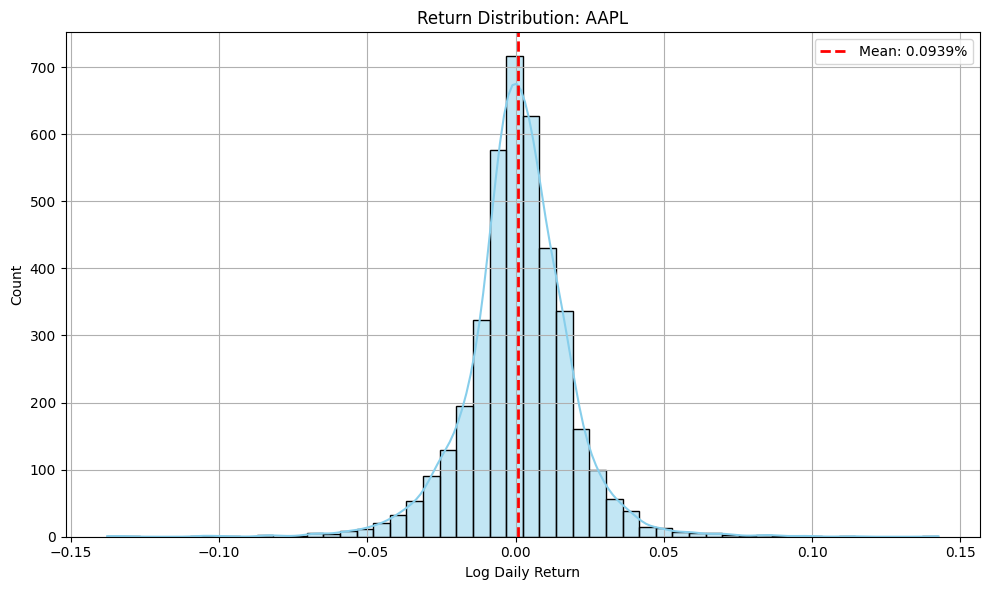

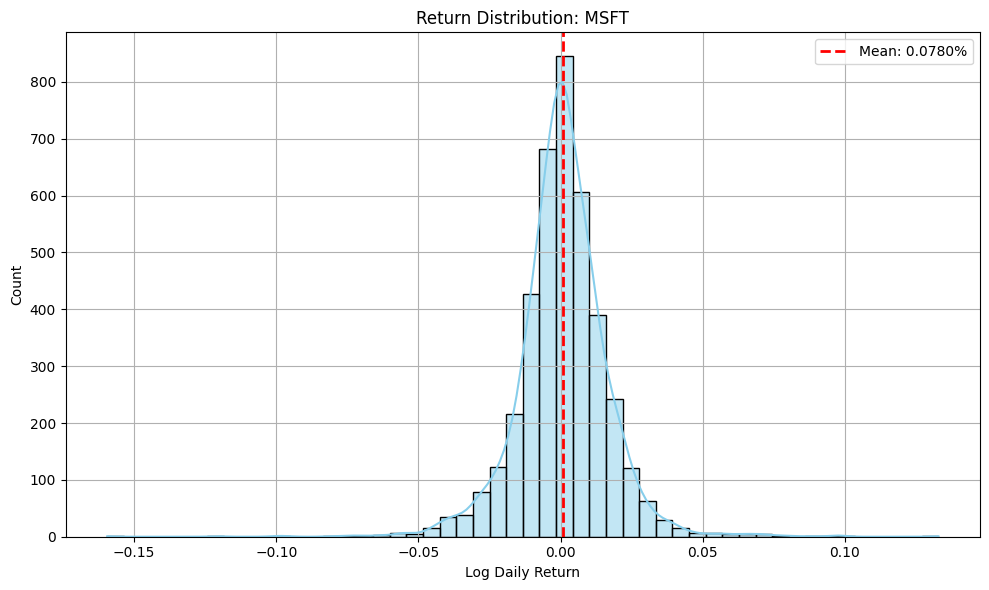

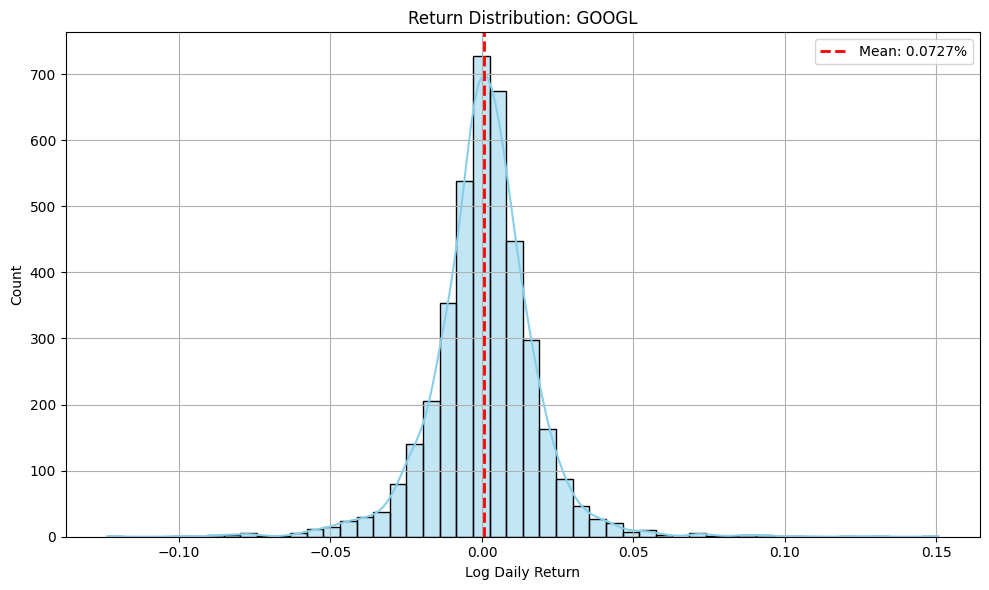

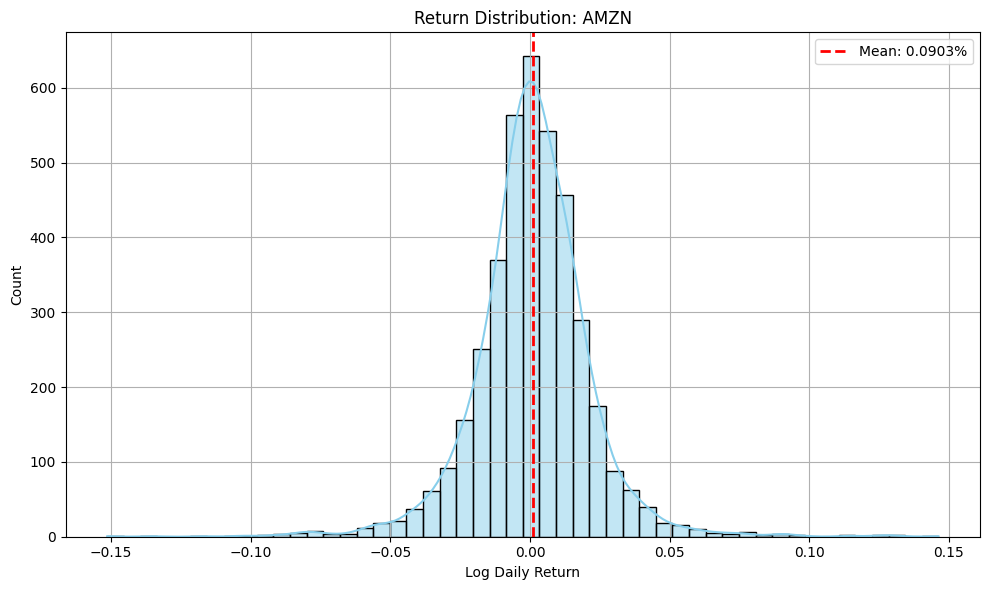

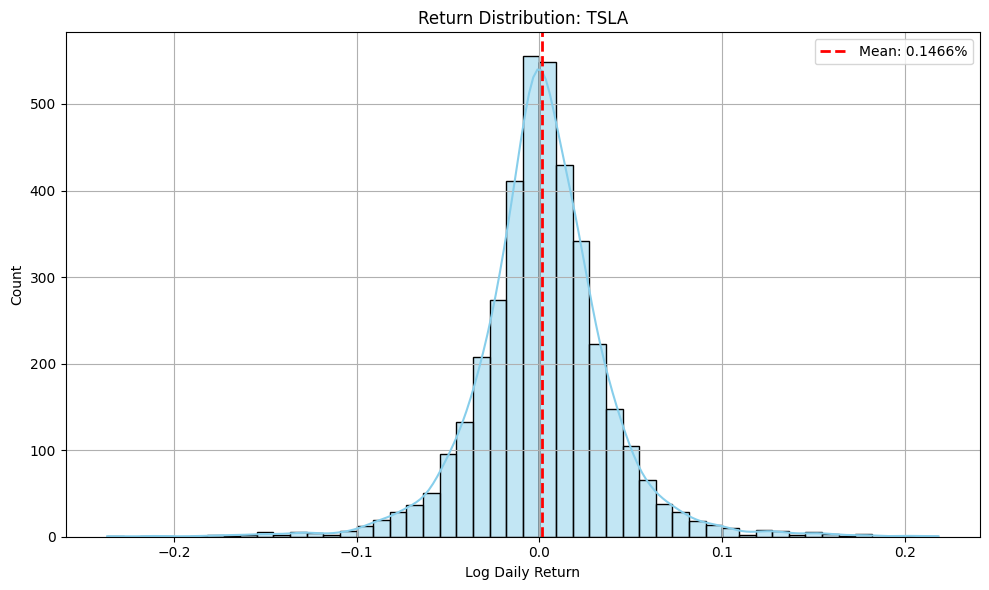

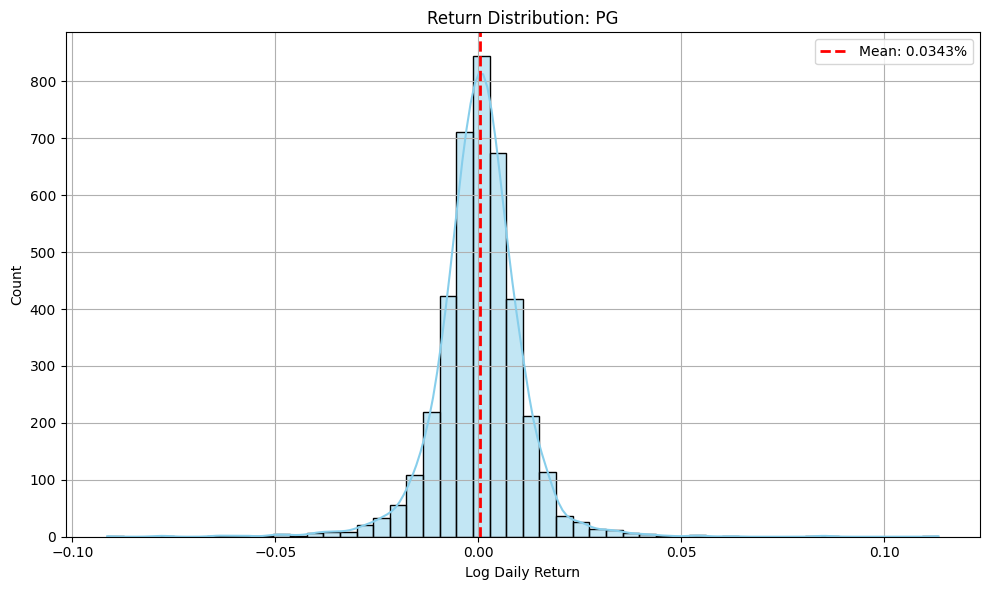

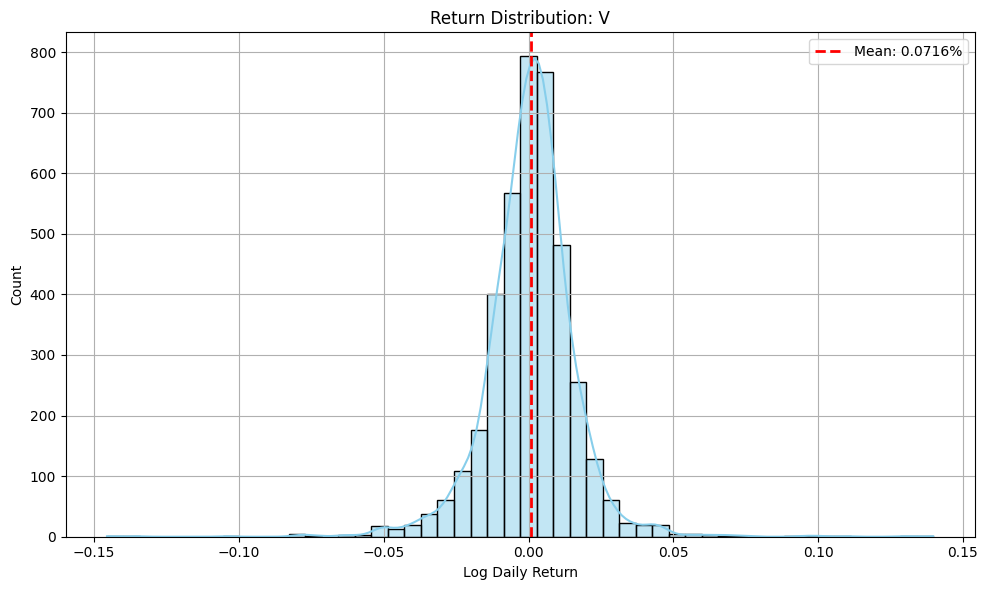

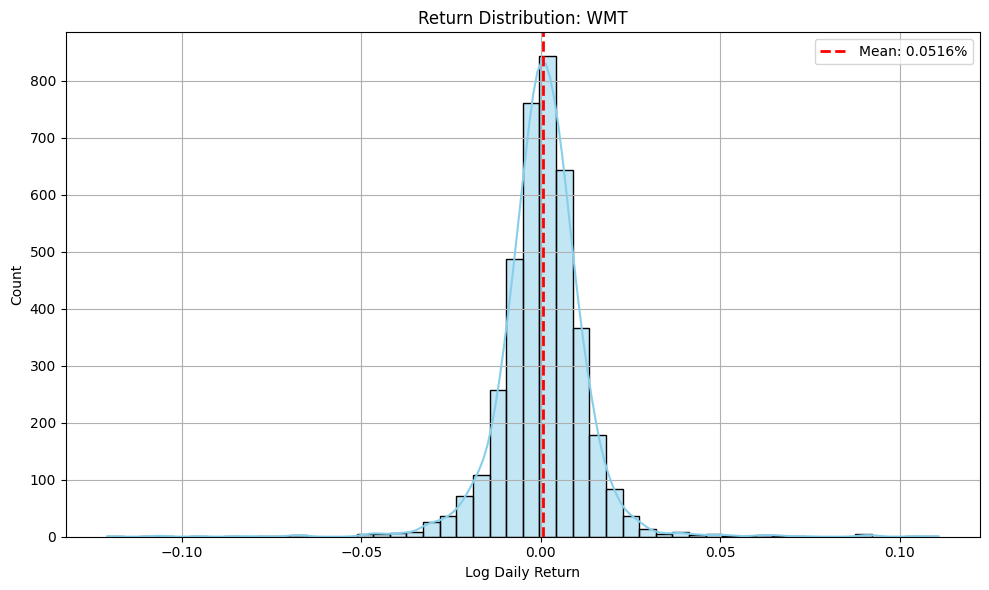

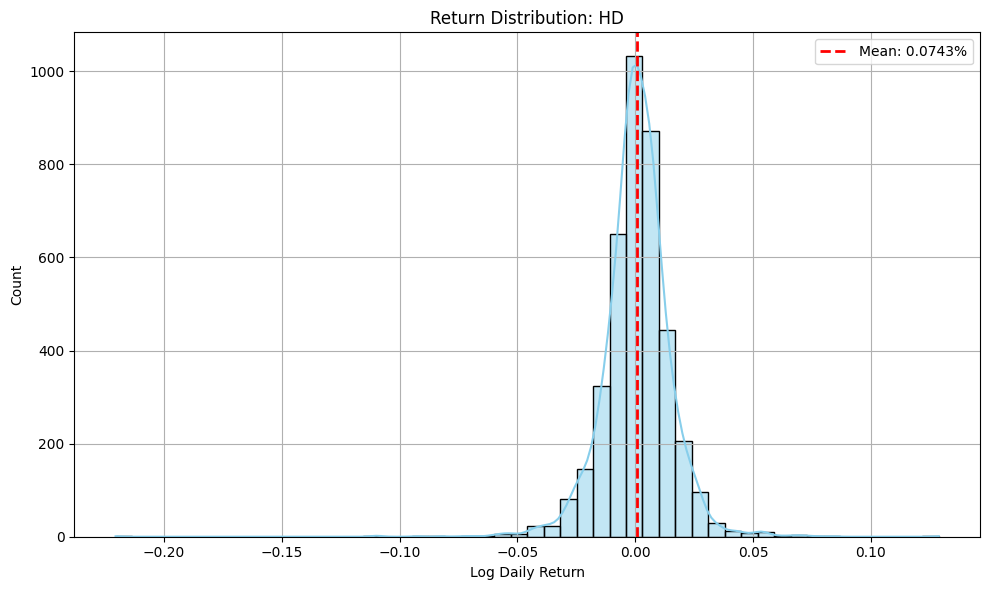

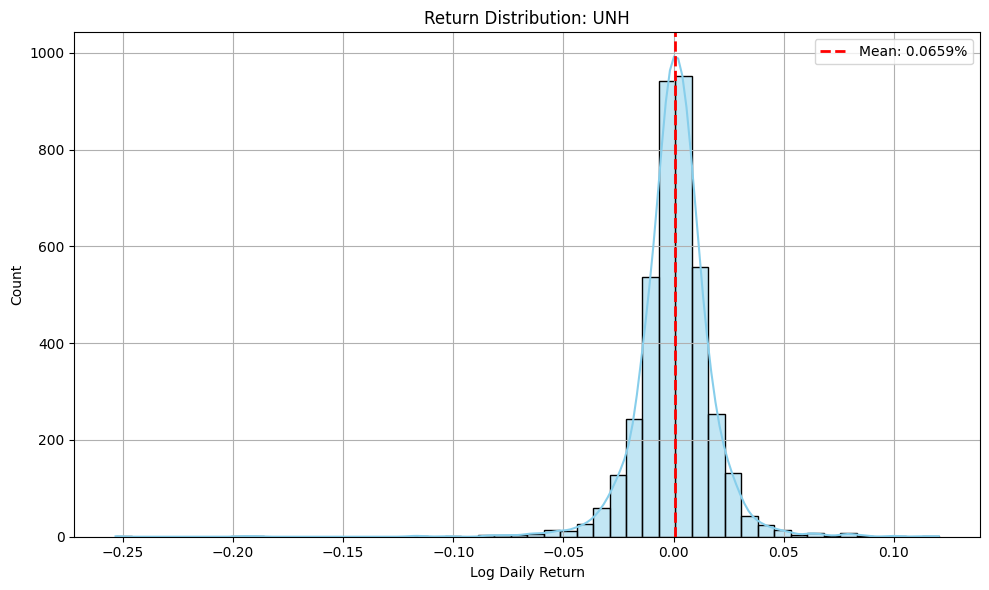

In [7]:
# La distribución de los resultados diarios y su media del periodo.

def plot_all_return_distributions(df: pd.DataFrame):
    """
    For each asset in the DataFrame:
    - Computes log daily returns
    - Prints expected return
    - Plots return distribution with mean line
    """
    if df.empty:
        print("DataFrame is empty. Please check your data.")
        return

    for column in df.columns:
        if df[column].isnull().all():
            print(f"Skipping {column} — all values are NaN.")
            continue

        try:
            # Compute log returns
            returns = np.log(df[column] / df[column].shift(1)).dropna()
            expected_return = returns.mean()

            # Plot
            plt.figure(figsize=(10, 6))
            sns.histplot(returns, bins=50, kde=True, color='skyblue')
            plt.axvline(expected_return, color='red', linestyle='--', linewidth=2, label=f"Mean: {expected_return:.4%}")
            plt.title(f"Return Distribution: {column}")
            plt.xlabel("Log Daily Return")
            plt.grid(True)
            plt.legend()
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"Error processing {column}: {e}")

plot_all_return_distributions(stock_data)

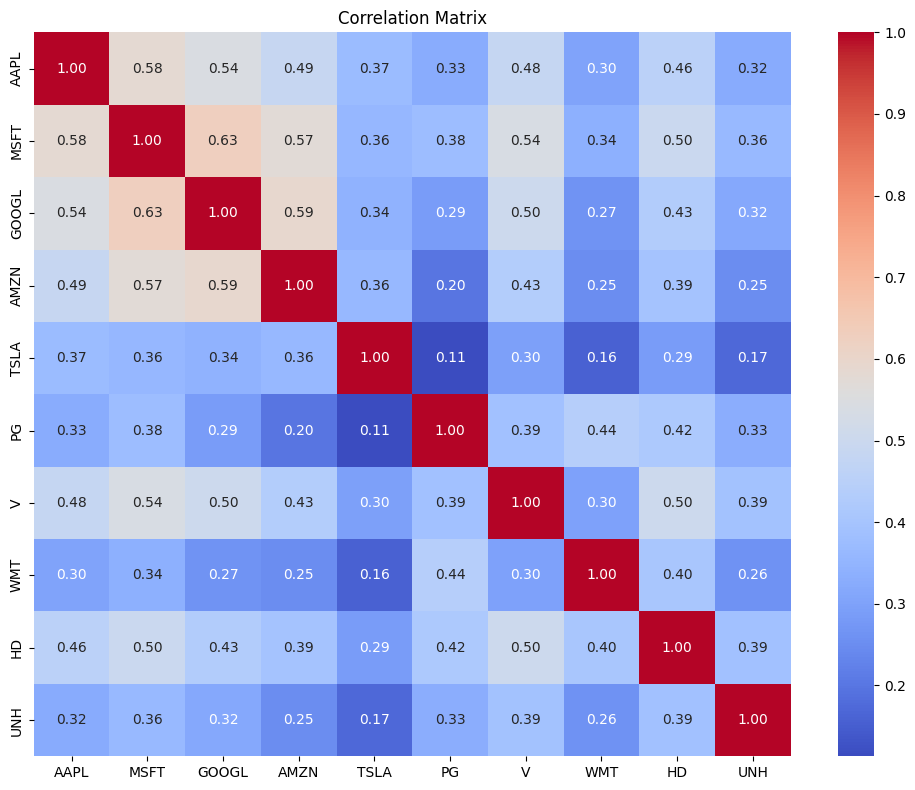

In [8]:
# Mapa de correlaciones

def plot_correlation_heatmap(df: pd.DataFrame, title: str = "Correlation Matrix"):
    returns = df.pct_change().dropna()
    corr = returns.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_correlation_heatmap(stock_data)

# **AQUÍ ES PARA CONTROLAR LOS INPUTS DE MONTE CARLO**

In [9]:
# URL del Euríbor 12 meses en Global-Rates
url = "https://www.global-rates.com/es/tipos-de-interes/euribor/4/euribor-interes-12-meses/"

response = requests.get(url)
response.raise_for_status()  # Verificamos que la respuesta sea 200 OK

# Analizamos el HTML con BeautifulSoup
soup = BeautifulSoup(response.text, "lxml")

# Buscamos la tabla de "Últimas tasas de Euribor a 12 meses"
tables = soup.find_all("table")
euribor_table = tables[0]
rows = euribor_table.find_all("tr")[1:]

# Tomamos la primera fila (último dato disponible)
latest_row = rows[0].find_all("td")
date = latest_row[0].text.strip()
rate = latest_row[1].text.strip()

# Limpiamos y convertimos a float
rate_value = float(rate.replace("%", "").replace(",", ".")) / 100

print(f"Fecha: {date}")
print(f"Euríbor 12M: {rate}")

Fecha: 06-11-2025
Euríbor 12M: 2,211 %


In [10]:
# Parámetros de la simulación de montecarlo:

default_num_portfolios = 1000
num_portfolios = input(f"Enter number of portfolios [default: {default_num_portfolios}]: ") or default_num_portfolios

rf_rate = input(f"Enter risk free rate [default: {rate_value}]: ") or rate_value


Enter number of portfolios [default: 1000]: 
Enter risk free rate [default: 0.022109999999999998]: 


In [11]:
# Arrays para el almacenamiento de los resultados.

all_weights = np.zeros((num_portfolios, len(stocks)))
ret_arr = np.zeros(num_portfolios)
vol_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

In [12]:
# Simulación de Monte Carlo.

for port in range(num_portfolios):
  #Generamos pesos aleatorios:
  weights = np.random.random(len(stocks))
  weights = weights/np.sum(weights)         # Normalización de los pesos.
  all_weights[port,:] = weights

  # Calculamos el retorno esperado.
  port_ret = np.sum(returns.mean()*weights)*252
  ret_arr[port] = port_ret

  # Calculamos la volatilidad del portafolio.
  port_vol = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
  vol_arr[port] = port_vol

  # Calculamos el Sharp Ratio.
  sharpe_arr[port] = (port_ret - rf_rate)/port_vol

In [15]:
# Vamos a encontrar el portafolio óptimo, - el mayor Sharpe Rati -.

optimal_idx = sharpe_arr.argmax()
optimal_weights = all_weights[optimal_idx,:]
optimal_ret = ret_arr[optimal_idx]
optimal_vol = vol_arr[optimal_idx]
optimal_sharpe = sharpe_arr[optimal_idx]

# Creamos un DataFrame con los resultados

results = pd.DataFrame({
    'Return': ret_arr,
    'Volatility': vol_arr,
    'Sharpe Ratio': sharpe_arr
    })

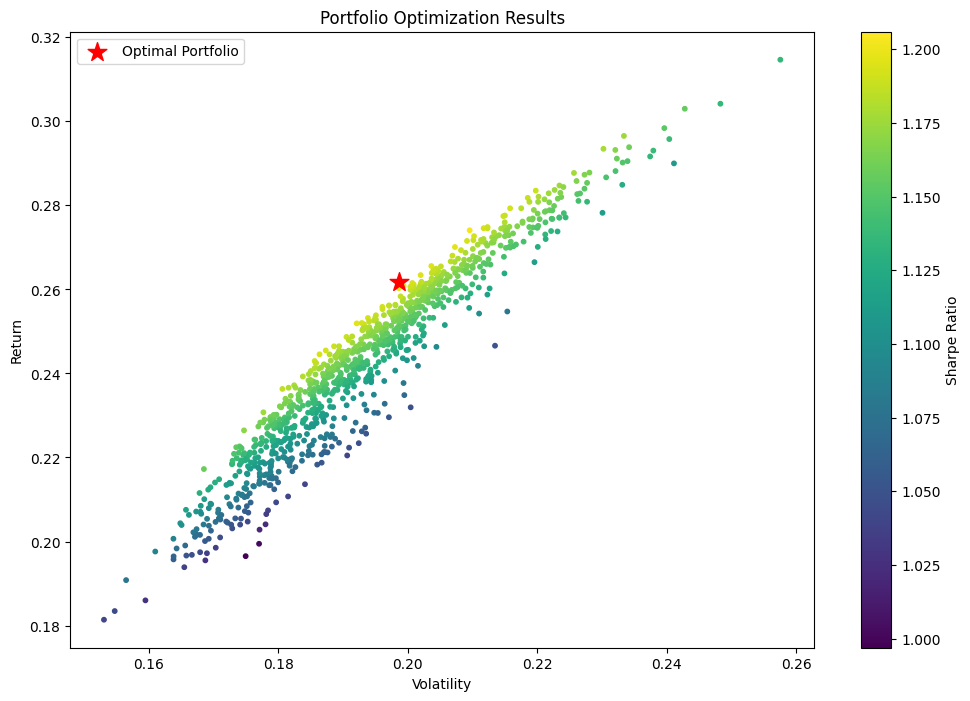

In [16]:
# Visualización.

plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c = sharpe_arr, cmap = 'viridis', marker = 'o', s = 10)
plt.colorbar(label='Sharpe Ratio')
plt.scatter(optimal_vol, optimal_ret, color='red', marker='*', s=200, label = 'Optimal Portfolio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Portfolio Optimization Results')
plt.legend()
plt.show()

# **Prueba de report**

In [21]:
class PortfolioOptimizer:
    def __init__(self, stocks, optimal_weights, optimal_ret, optimal_vol, optimal_sharpe, stock_data, ret_arr, vol_arr, sharpe_arr):
        self.stocks = stocks
        self.optimal_weights = optimal_weights
        self.optimal_ret = optimal_ret
        self.optimal_vol = optimal_vol
        self.optimal_sharpe = optimal_sharpe
        self.stock_data = stock_data
        self.ret_arr = ret_arr
        self.vol_arr = vol_arr
        self.sharpe_arr = sharpe_arr


    def report(self):
        md = f"""
### **Portafolio Óptimo**
--------------------
**Retorno Esperado:** {self.optimal_ret * 100:.2f}%
**Volatilidad:** {self.optimal_vol * 100:.2f}%
**Ratio de Sharpe:** {self.optimal_sharpe:.2f}

**Pesos Óptimos:**
"""
        for stock, weight in zip(self.stocks, self.optimal_weights):
            md += f"- {stock}: {weight * 100:.2f}%\n"

        md += """
---
 *Este portafolio representa la combinación con el mayor ratio de Sharpe encontrada durante la simulación Monte Carlo o el proceso de optimización.*
"""
        display(Markdown(md))

    def plots_report(self):
        print("==============================================")
        print(" PORTFOLIO VISUAL REPORT")
        print("==============================================\n")

        print("🔹 1️⃣ Correlaciones entre activos")
        plot_correlation_heatmap(self.stock_data)
        print("\n----------------------------------------------")

        print("🔹 2️⃣ Distribuciones de retornos diarios")
        plot_all_return_distributions(self.stock_data)
        print("\n----------------------------------------------")

        print("🔹 3️⃣ Resultados de optimización de cartera")
        plt.figure(figsize=(12, 8))
        scatter = plt.scatter(
            self.vol_arr,
            self.ret_arr,
            c=self.sharpe_arr,
            cmap='viridis',
            marker='o',
            s=10
        )
        plt.colorbar(scatter, label='Sharpe Ratio')
        plt.scatter(
            self.optimal_vol,
            self.optimal_ret,
            color='red',
            marker='*',
            s=200,
            label='Optimal Portfolio'
        )
        plt.xlabel('Volatility')
        plt.ylabel('Return')
        plt.title('Portfolio Optimization Results')
        plt.legend()
        plt.show()

        print("\n Todos los gráficos se han generado correctamente.")

# Crear la instancia del PortfolioOptimizer class con los datos del portafolio óptimo.
optimal_portfolio = PortfolioOptimizer(stocks, optimal_weights, optimal_ret, optimal_vol, optimal_sharpe, stock_data, ret_arr, vol_arr, sharpe_arr)


In [22]:
# Call the report method on the instance
optimal_portfolio.report()


### **Portafolio Óptimo**
--------------------
**Retorno Esperado:** 26.17%
**Volatilidad:** 19.87%
**Ratio de Sharpe:** 1.21

**Pesos Óptimos:**
- AAPL: 10.95%
- MSFT: 5.72%
- GOOGL: 5.88%
- AMZN: 8.78%
- TSLA: 15.12%
- PG: 0.50%
- V: 2.89%
- WMT: 20.59%
- HD: 18.25%
- UNH: 11.34%

---
 *Este portafolio representa la combinación con el mayor ratio de Sharpe encontrada durante la simulación Monte Carlo o el proceso de optimización.*


In [ ]:
# Function definition moved to the PortfolioOptimizer class

 PORTFOLIO VISUAL REPORT

🔹 1️⃣ Correlaciones entre activos


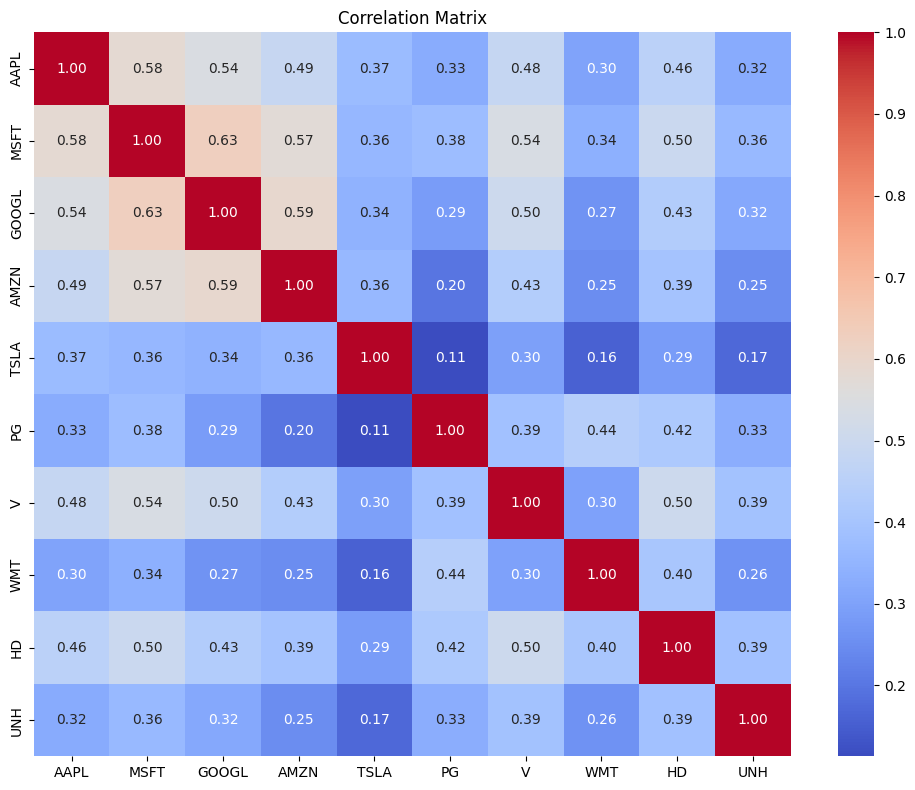


----------------------------------------------
🔹 2️⃣ Distribuciones de retornos diarios


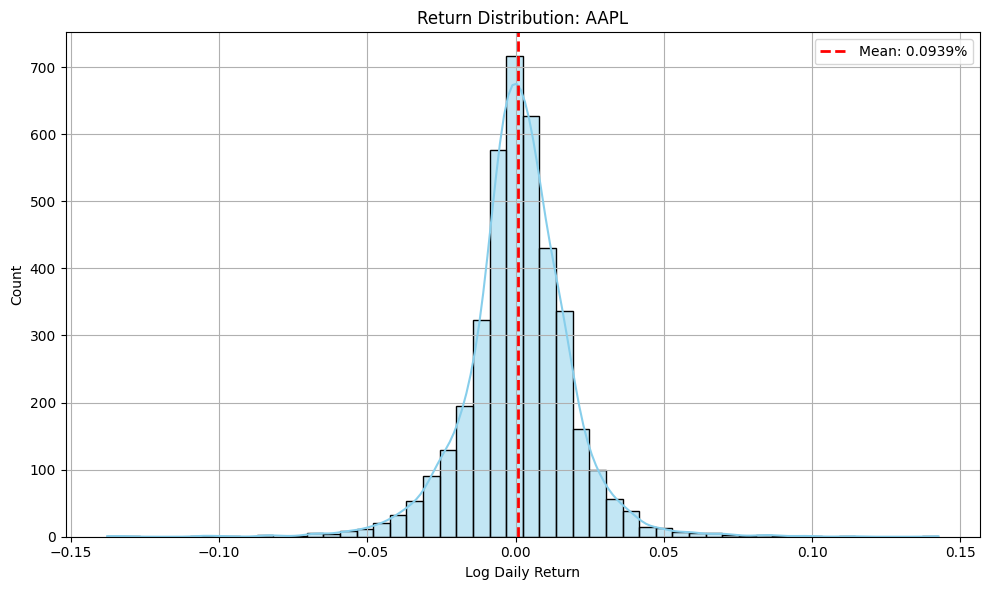

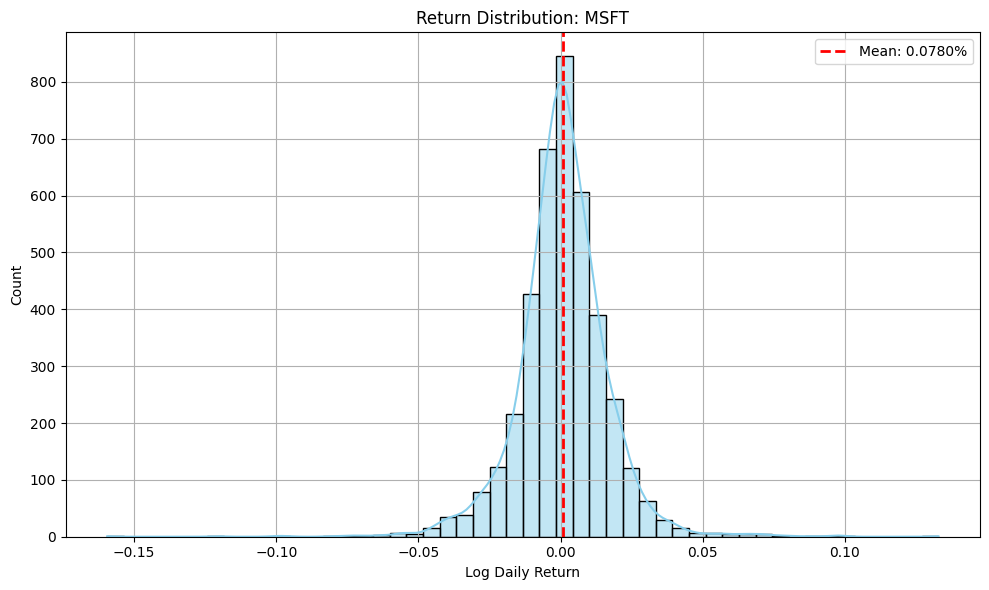

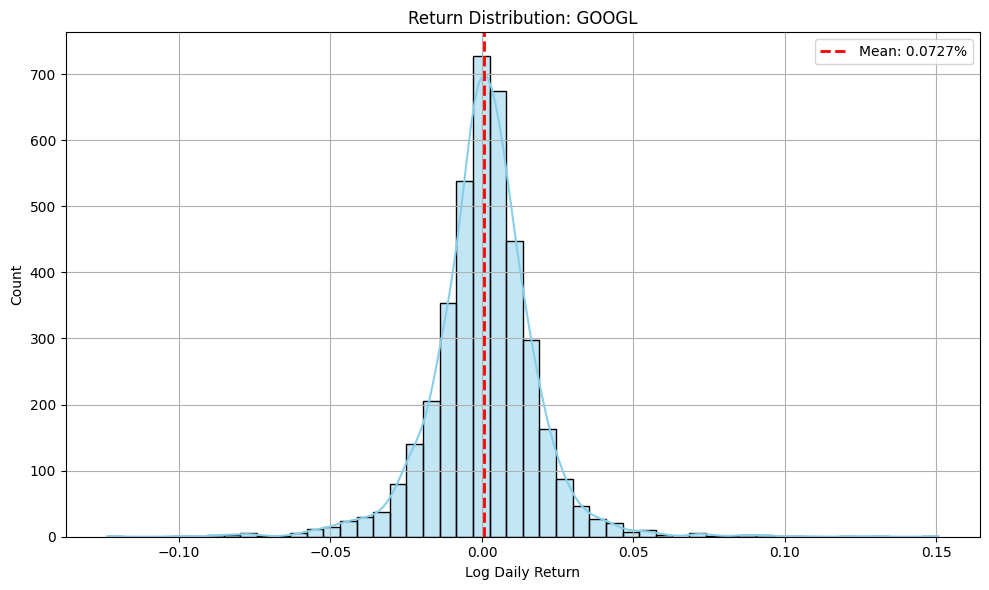

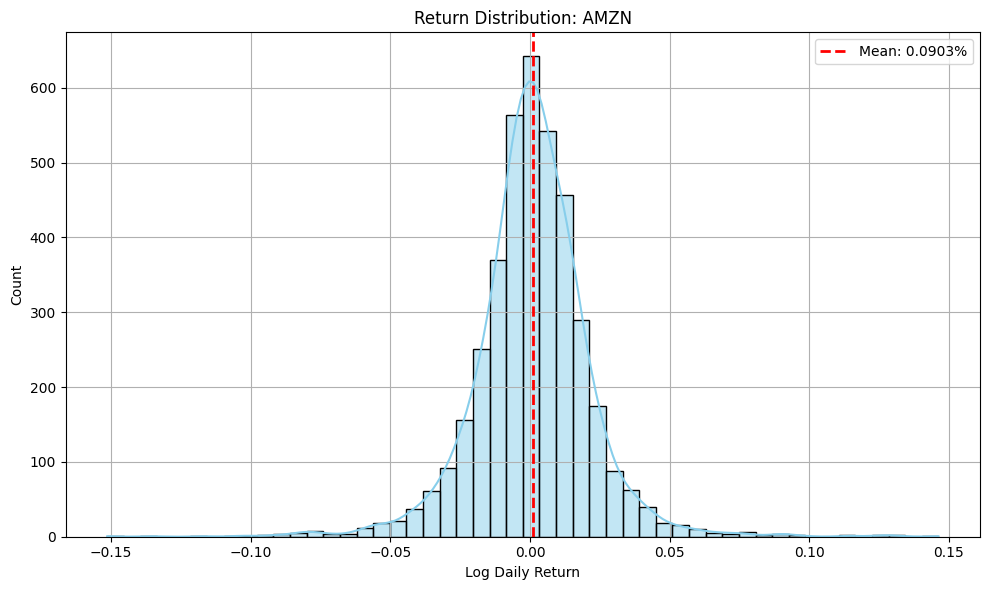

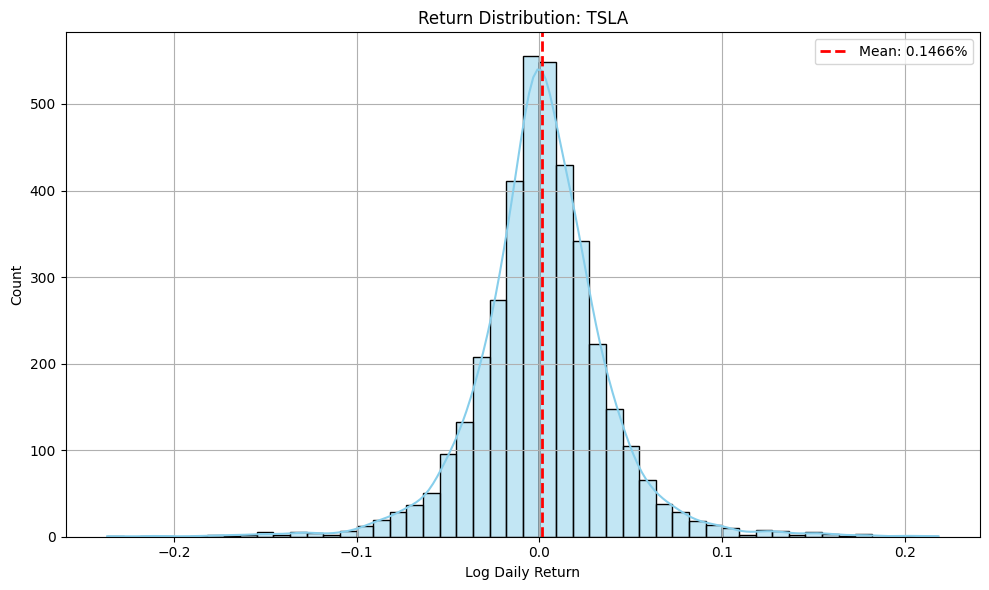

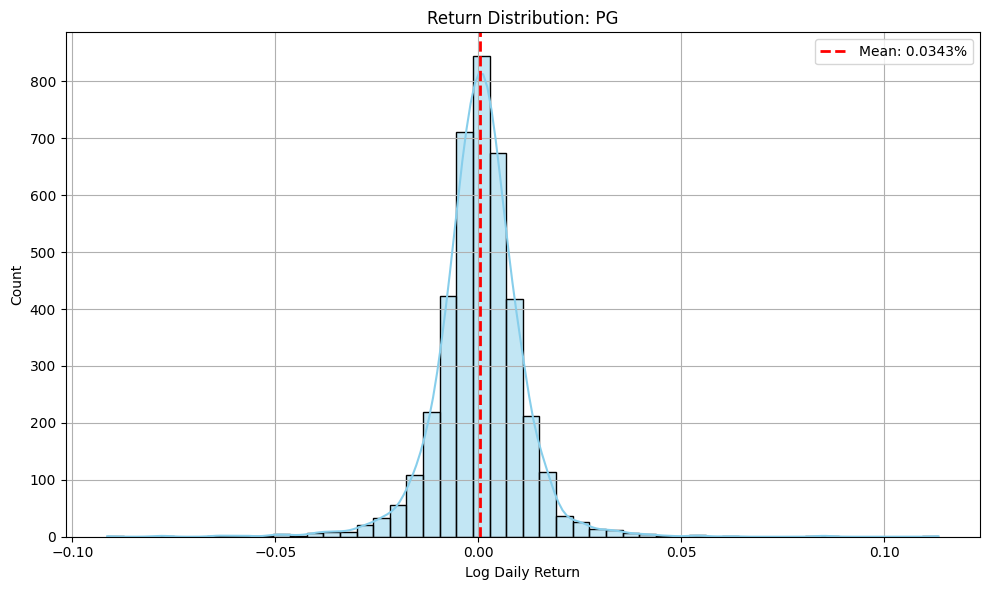

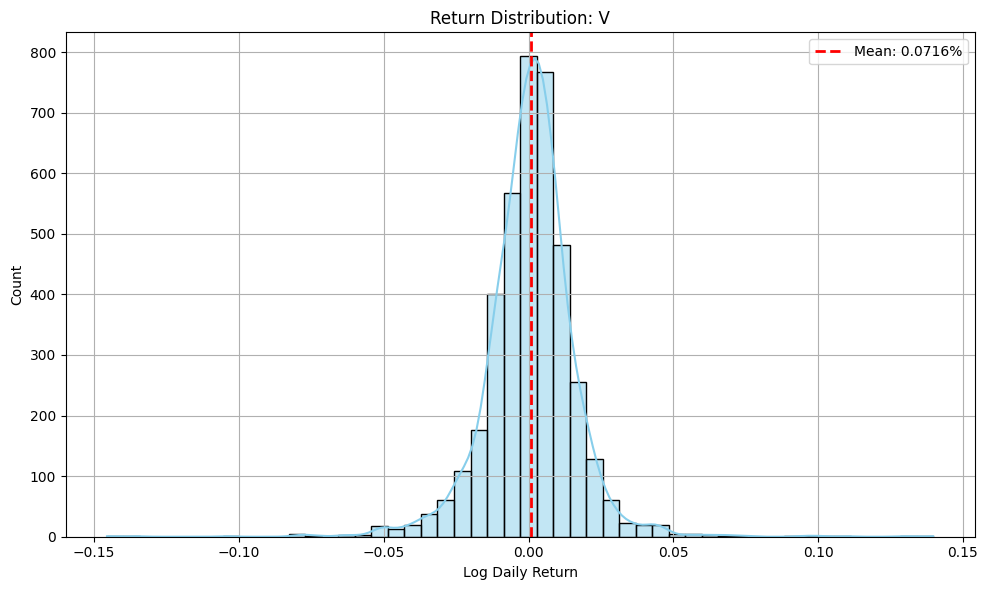

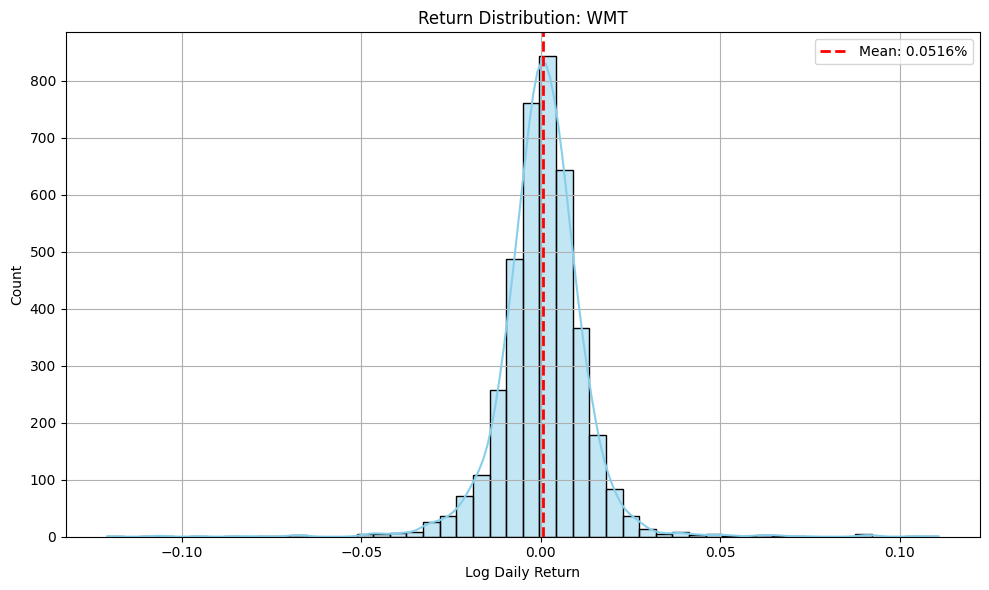

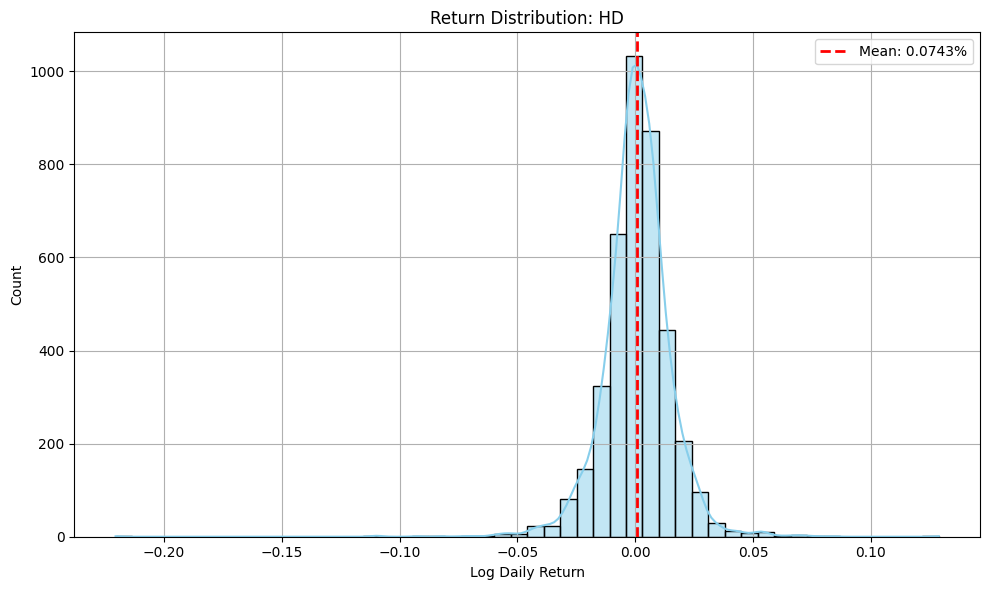

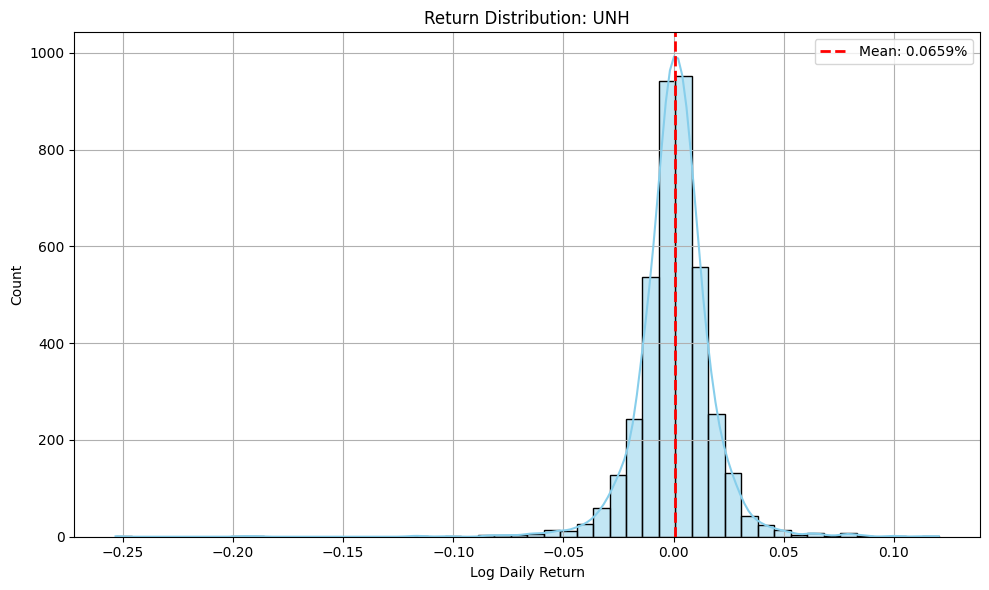


----------------------------------------------
🔹 3️⃣ Resultados de optimización de cartera


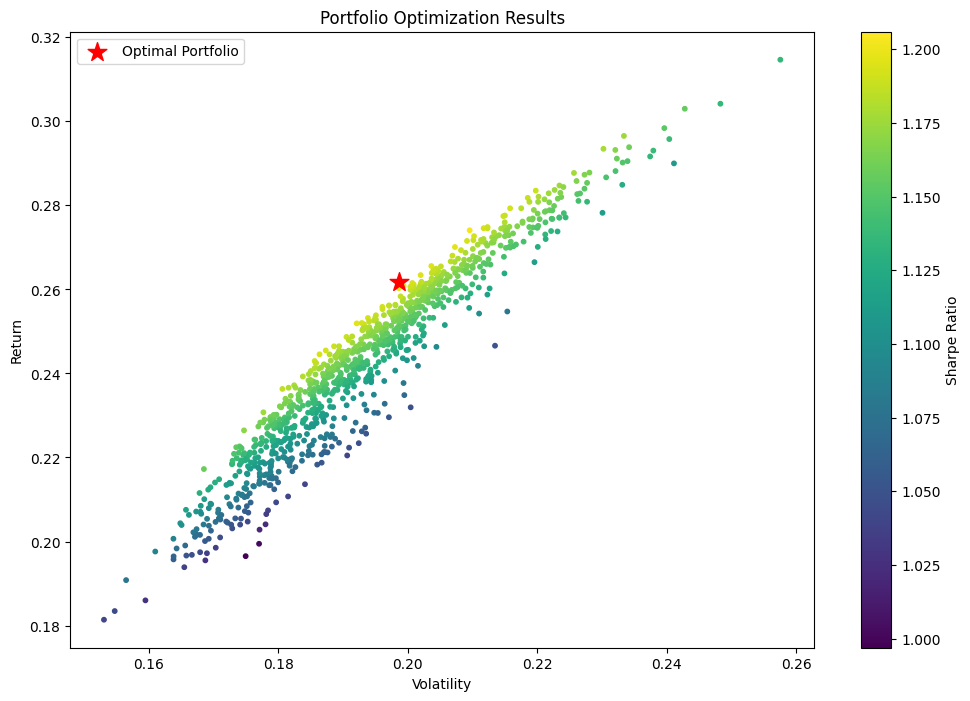


 Todos los gráficos se han generado correctamente.


In [23]:
optimal_portfolio.plots_report()